In [ ]:
#PASO 1 Incluir librerías para el trabajo con el modelo

#Librerías Base
import pandas as pd #trabajo con datos
from pandas import set_option
import numpy as np #para trabajo con numeros y matrices
import matplotlib as mpl
import matplotlib.pyplot as plt #para graficar


#Librerías para modelos
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split #separar automáticamente los datos en entrenamiento y validación
from sklearn.linear_model import LinearRegression #regresión lineal


In [ ]:
#PASO 2: Cargar los datos

dataset = pd.read_csv('20200110_EVALUACION_DOCENTE_2018_10052019_PUBL.csv',  sep=';')




In [ ]:
#PASO 3: Entender los datos

In [ ]:
#PASO 3.1 --> Ver datos
dataset.head(30)

,AÑO_EVAL,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,NOM_DEPROV_RBD,COD_DEPE,COD_DEPE2,RURAL_RBD,MRUN,CLAVE,DOC_GENERO,NIVEL,SUBSECT,AE_PJE,EP_PJE,IRT_PJE,PF_PJE,PF_ESC,INSTR_PJE,CCE_ESC
0,2018,1,9,LICEO POLITECNICO ARICA,15,151,15101,ARICA,151,ARICA,2,1,0,11446464,AB1079758711,1,7,GASTR,4,3,3,"2,23",B,"2,64",C
1,2018,1,9,LICEO POLITECNICO ARICA,15,151,15101,ARICA,151,ARICA,2,1,0,13462227,BB1044006211,1,6,EAEMM,4,3,4,"2,4",B,"2,84",C
2,2018,1,9,LICEO POLITECNICO ARICA,15,151,15101,ARICA,151,ARICA,2,1,0,20874422,CA1040330521,2,4,L,4,3,3,"2,58",C,"2,85",D
3,2018,1,9,LICEO POLITECNICO ARICA,15,151,15101,ARICA,151,ARICA,2,1,0,23212113,CB1103312711,1,7,CONST_MET,4,3,2,"2,52",C,"2,71",C
4,2018,1,9,LICEO POLITECNICO ARICA,15,151,15101,ARICA,151,ARICA,2,1,0,396505,CE1685868311,1,4,H,4,2,3,"1,8",I,"2,18",B
5,2018,1,9,LICEO POLITECNICO ARICA,15,151,15101,ARICA,151,ARICA,2,1,0,11297873,QR1326313711,1,6,EAEMI,3,2,3,"1,8",I,"2,08",B
6,2018,2,7,PARVULARIO LAS ESPIGUITAS,15,151,15101,ARICA,151,ARICA,2,1,0,9605059,JI1899045021,2,1,P,4,3,4,"2,25",B,"2,75",C
7,2018,2,7,PARVULARIO LAS ESPIGUITAS,15,151,15101,ARICA,151,ARICA,2,1,0,9617801,ML1353974721,2,1,P,3,3,4,"2,05",B,"2,53",C
8,2018,4,3,LICEO OCTAVIO PALMA PEREZ,15,151,15101,ARICA,151,ARICA,2,1,0,17666027,BB1088508921,2,4,AV,4,3,3,"2,2",B,"2,62",C
9,2018,4,3,LICEO OCTAVIO PALMA PEREZ,15,151,15101,ARICA,151,ARICA,2,1,0,15814500,CA1050803521,2,4,H,4,3,3,"2,2",B,"2,62",C


In [60]:
# Separación previa
X_preview = dataset.iloc[:,2:3] 
y_preview = dataset.loc[:,"INSTR_PJE"] 

In [39]:
X_preview

,DGV_RBD
0,9
1,9
2,9
3,9
4,9
...,...
22040,2
22041,2
22042,2
22043,2


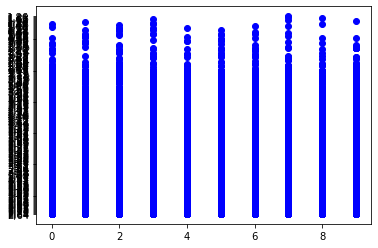

In [35]:
# PASO 3.2 --> Graficar
plt.scatter(X_preview, y_preview, color="blue")

In [ ]:
dataset.dtypes

AÑO_EVAL           int64
RBD                int64
DGV_RBD            int64
NOM_RBD           object
COD_REG_RBD        int64
COD_PRO_RBD        int64
COD_COM_RBD        int64
NOM_COM_RBD       object
COD_DEPROV_RBD     int64
NOM_DEPROV_RBD    object
COD_DEPE           int64
COD_DEPE2          int64
RURAL_RBD          int64
MRUN               int64
CLAVE             object
DOC_GENERO         int64
NIVEL              int64
SUBSECT           object
AE_PJE             int64
EP_PJE             int64
IRT_PJE            int64
PF_PJE            object
PF_ESC            object
INSTR_PJE         object
CCE_ESC           object
dtype: object

In [ ]:
dataset.describe()

,AÑO_EVAL,RBD,DGV_RBD,COD_REG_RBD,COD_PRO_RBD,COD_COM_RBD,COD_DEPROV_RBD,COD_DEPE,COD_DEPE2,RURAL_RBD,MRUN,DOC_GENERO,NIVEL,AE_PJE,EP_PJE,IRT_PJE
count,22045.0,22045.000000,22045.000000,22045.000000,22045.000000,22045.000000,22045.000000,22045.000000,22045.000000,22045.00000,2.204500e+04,22045.000000,22045.000000,22045.000000,22045.000000,22045.000000
mean,2018.0,7724.260240,4.465911,8.680517,88.982626,8904.242822,89.195736,1.998186,1.258925,0.22191,1.250207e+07,1.739896,3.263960,3.481152,2.648764,2.724427
std,0.0,6849.233332,2.899668,3.602599,35.794413,3581.671988,36.632005,1.024645,0.849767,0.41554,7.275568e+06,0.438701,1.382864,1.389905,1.205206,1.249113
min,2018.0,1.000000,0.000000,1.000000,11.000000,1101.000000,11.000000,1.000000,1.000000,0.00000,1.733000e+03,1.000000,1.000000,-1.000000,-1.000000,-1.000000
25%,2018.0,2736.000000,2.000000,6.000000,61.000000,6110.000000,61.000000,1.000000,1.000000,0.00000,6.174736e+06,1.000000,2.000000,4.000000,3.000000,3.000000
50%,2018.0,6178.000000,4.000000,8.000000,84.000000,8405.000000,83.000000,2.000000,1.000000,0.00000,1.251603e+07,2.000000,3.000000,4.000000,3.000000,3.000000
75%,2018.0,10267.000000,7.000000,13.000000,131.000000,13108.000000,132.000000,2.000000,1.000000,0.00000,1.884071e+07,2.000000,4.000000,4.000000,3.000000,3.000000
max,2018.0,40429.000000,9.000000,15.000000,152.000000,15202.000000,151.000000,6.000000,5.000000,1.00000,2.570711e+07,2.000000,7.000000,4.000000,4.000000,4.000000


In [ ]:
set_option('display.width', 100)
set_option('precision', 2)

In [58]:
#Esta funcion toma un valor y sustituye la "," por "."
def convert_value(val):
    new_val = val.replace(',','.')
    return float(new_val)

In [64]:
#Es necesario transformar el data set la variable "INSTR_PJE" debido a que los decimales estan como "," 
# y para poder leer y utilizar la data los decimales deben ser separados por "." (valor numerico).
y_preview = y_preview.apply(convert_value)
dataset["INSTR_PJE"].apply(convert_value)

AttributeError: ignored

In [76]:
dataset["AÑO_EVAL"]

0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
22040    2018
22041    2018
22042    2018
22043    2018
22044    2018
Name: AÑO_EVAL, Length: 22045, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


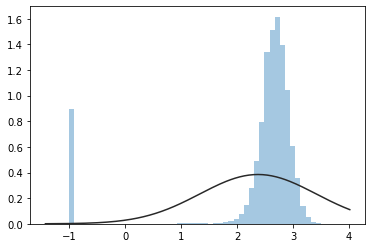

In [62]:
#Grafico de distribución para la variable Y --> si la distribución se parece a normal, es viable construir un modelo con los datos
import seaborn as sns
import scipy.stats as st

sns.distplot(tuple(y_preview), kde=False, fit=st.norm)

In [63]:
#Análisis de Corerlación de Variables --> ¿existen dos variables que explican lo mismo?
correlacion = dataset.corr()
correlacion.head(20)

,AÑO_EVAL,RBD,DGV_RBD,COD_REG_RBD,COD_PRO_RBD,COD_COM_RBD,COD_DEPROV_RBD,COD_DEPE,COD_DEPE2,RURAL_RBD,MRUN,DOC_GENERO,NIVEL,AE_PJE,EP_PJE,IRT_PJE,INSTR_PJE
AÑO_EVAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RBD,NaN,1.000000,0.016145,0.447564,0.446948,0.446985,0.449686,0.048476,0.091512,-0.150417,-0.000831,0.019616,-0.039754,-0.263796,-0.248889,-0.258278,-0.268512
DGV_RBD,NaN,0.016145,1.000000,0.002955,0.002791,0.002782,0.002401,0.004025,-0.001941,0.024387,-0.011774,-0.008147,-0.006337,-0.009623,-0.004926,-0.005906,-0.008965
COD_REG_RBD,NaN,0.447564,0.002955,1.000000,0.999020,0.999038,0.999261,-0.053996,-0.023137,-0.050002,-0.004927,0.015703,-0.028746,-0.081548,-0.084553,-0.087116,-0.081872
COD_PRO_RBD,NaN,0.446948,0.002791,0.999020,1.000000,0.999998,0.998486,-0.057745,-0.028049,-0.044443,-0.005247,0.015913,-0.028615,-0.080295,-0.083413,-0.086115,-0.080419
COD_COM_RBD,NaN,0.446985,0.002782,0.999038,0.999998,1.000000,0.998511,-0.057656,-0.027905,-0.044521,-0.005238,0.015897,-0.028630,-0.080308,-0.083414,-0.086111,-0.080421
COD_DEPROV_RBD,NaN,0.449686,0.002401,0.999261,0.998486,0.998511,1.000000,-0.055588,-0.021788,-0.053054,-0.004745,0.016001,-0.028780,-0.081056,-0.084690,-0.087473,-0.081643
COD_DEPE,NaN,0.048476,0.004025,-0.053996,-0.057745,-0.057656,-0.055588,1.000000,0.906869,0.001905,0.009165,0.041537,-0.114148,-0.281573,-0.263462,-0.261856,-0.283289
COD_DEPE2,NaN,0.091512,-0.001941,-0.023137,-0.028049,-0.027905,-0.021788,0.906869,1.000000,-0.062135,0.007173,0.033668,-0.097385,-0.254509,-0.245707,-0.245784,-0.257180
RURAL_RBD,NaN,-0.150417,0.024387,-0.050002,-0.044443,-0.044521,-0.053054,0.001905,-0.062135,1.000000,0.007171,-0.007607,-0.113307,0.041016,0.044769,0.063634,0.042733


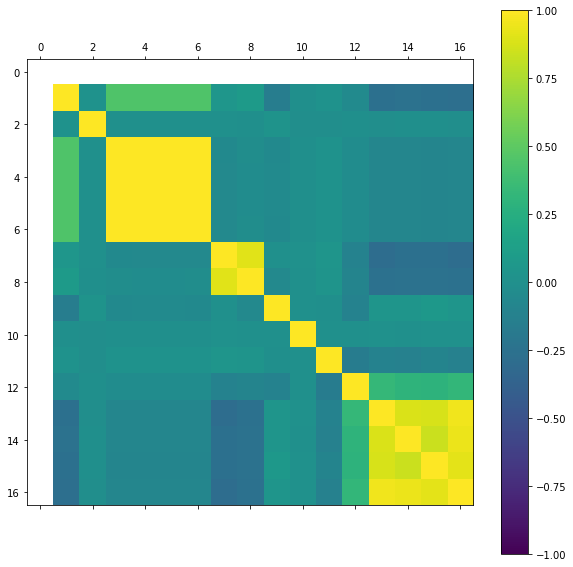

In [65]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlacion, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

#POR HACER
#conclusión: podría eliminar la variable 8(RAD) o 9(TAX) (nivel de correlación = 0.91 )
#            podría eliminar la variable 8(RAD) o 9(TAX) (nivel de correlación = 0.91 )

#INDUS | DIS  -0.71
#INDUS | TAX   0.72
#RAD   | TAX   0.91

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 2018.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 2018.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 2018.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])


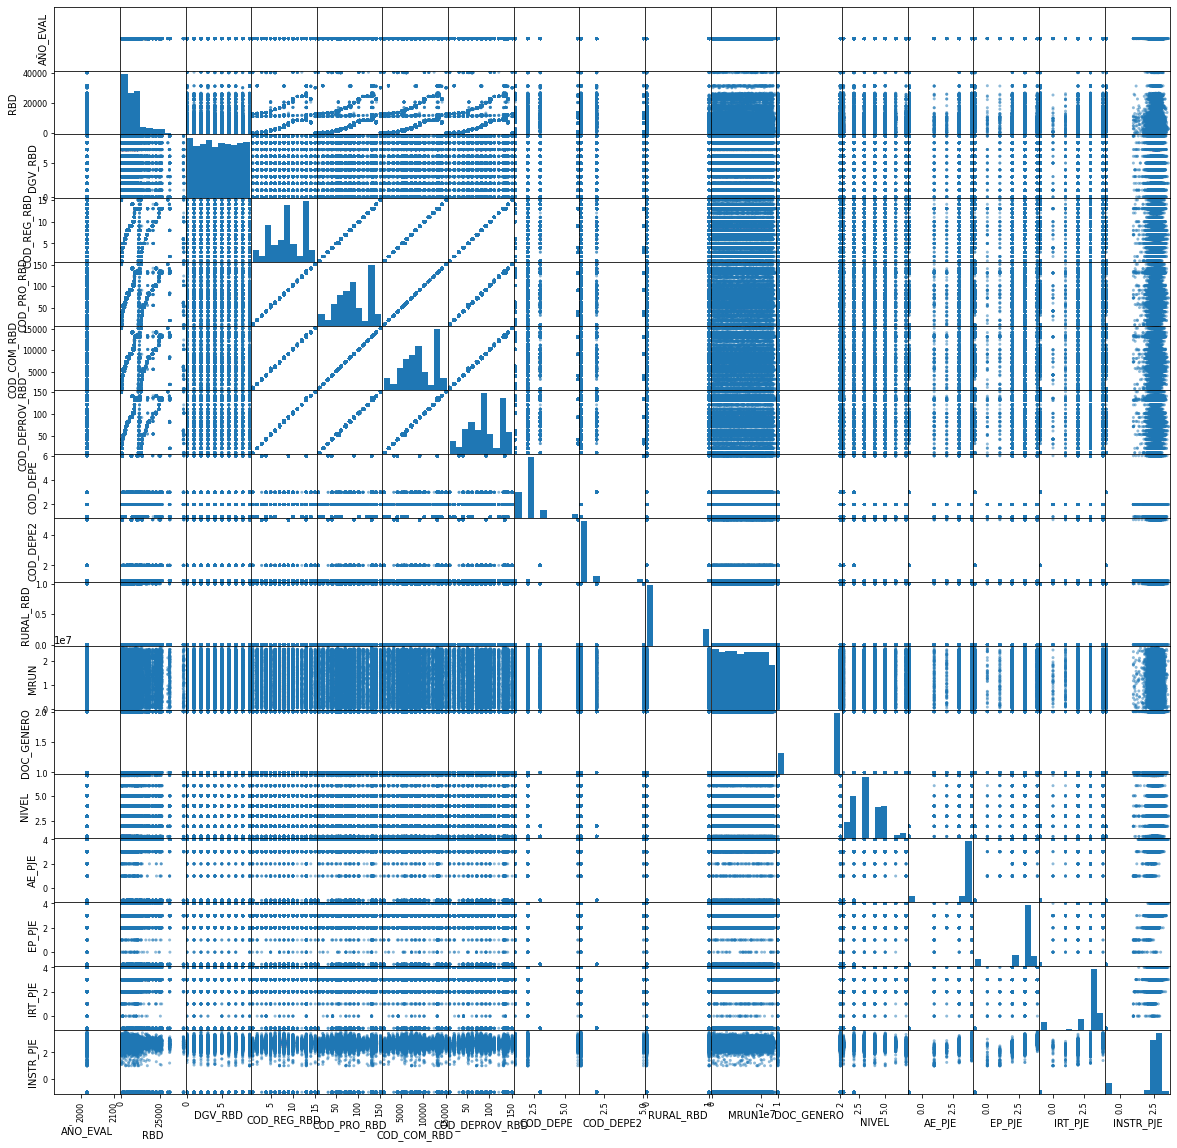

In [66]:
from pandas.plotting import scatter_matrix
#plt.figure(figsize=(20,20))
scatter_matrix(dataset, figsize=(20,20))
plt.show()

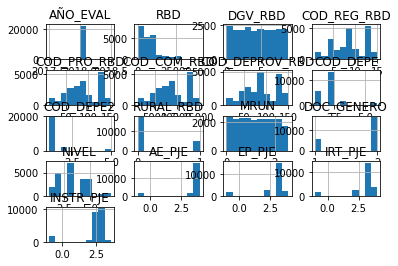

In [67]:
#Graficos de distribución de los valores

dataset.hist()
plt.show()

In [68]:
#SESGO (SKEW): 
skew = dataset.skew()
skew.head(20)

#valores positivos (sesgo a la derecha), valores negativos (sesgo a la izquierda), valores cercanos a 0 muestran menos sesgo
#AÑO_EVAL          0.000000  
#RBD               1.662269  Candidata a eliminar debido a que la informacion esta muy lejos de la variable principal de nuestro modelo
#DGV_RBD           0.008714  Candidata a eliminar debido a que la informacion esta muy lejos de la variable principal de nuestro modelo
#COD_REG_RBD      -0.094344  Candidata a eliminar debido a que la informacion esta muy lejos de la variable principal de nuestro modelo
#COD_PRO_RBD      -0.109925  Candidata a eliminar debido a que la informacion esta muy lejos de la variable principal de nuestro modelo
#COD_COM_RBD      -0.110211  Candidata a eliminar debido a que la informacion esta muy lejos de la variable principal de nuestro modelo
#COD_DEPROV_RBD   -0.087804  Candidata a eliminar debido a que la informacion esta muy lejos de la variable principal de nuestro modelo
#COD_DEPE          2.468185  Candidata a eliminar debido a que la informacion esta muy lejos de la variable principal de nuestro modelo
#COD_DEPE2         3.800297  Candidata a eliminar debido a que la informacion esta muy lejos de la variable principal de nuestro modelo
#RURAL_RBD         1.338573  Candidata a eliminar debido a que la informacion esta muy lejos de la variable principal de nuestro modelo
#MRUN              0.005072  Candidata a eliminar debido a que la informacion esta muy lejos de la variable principal de nuestro modelo
#DOC_GENERO       -1.093762  Candidata a eliminar debido a que la informacion esta muy lejos de la variable principal de nuestro modelo
#NIVEL             0.474698  Candidata a eliminar debido a que la informacion esta muy lejos de la variable principal de nuestro modelo

#AE_PJE           -2.749525  Variable potencial para nuestro modelo debido a que los datos estan agrupados a la derecha al igual que nuestra variable principal 
#EP_PJE           -2.153779  Variable potencial para nuestro modelo debido a que los datos estan agrupados a la derecha al igual que nuestra variable principal
#IRT_PJE          -2.039068  Variable potencial para nuestro modelo debido a que los datos estan agrupados a la derecha al igual que nuestra variable principal
#INSTR_PJE        -2.770173  


AÑO_EVAL          0.000000
RBD               1.662269
DGV_RBD           0.008714
COD_REG_RBD      -0.094344
COD_PRO_RBD      -0.109925
COD_COM_RBD      -0.110211
COD_DEPROV_RBD   -0.087804
COD_DEPE          2.468185
COD_DEPE2         3.800297
RURAL_RBD         1.338573
MRUN              0.005072
DOC_GENERO       -1.093762
NIVEL             0.474698
AE_PJE           -2.749525
EP_PJE           -2.153779
IRT_PJE          -2.039068
INSTR_PJE        -2.770173
dtype: float64

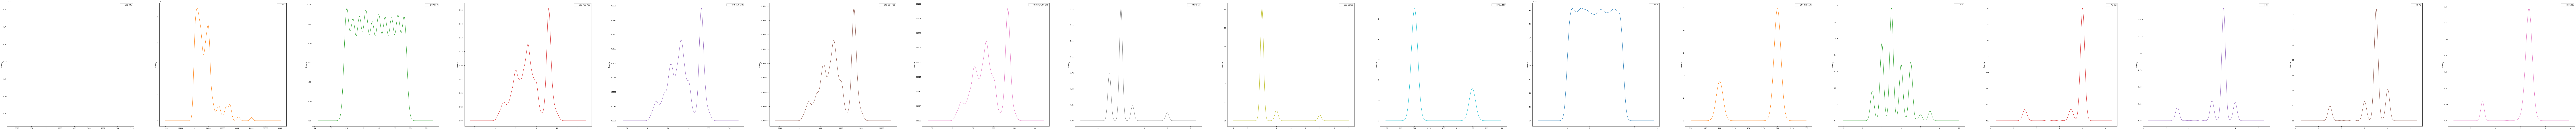

In [75]:
#graficos de densidad
#plt.figure(figsize=(200,200))
dataset.plot(kind='density', subplots=True, layout=(17,17), sharex=False, figsize=(300,300) )
plt.show()

In [80]:
#PASO 3.2 --> Separación previa



In [ ]:
#PASO 4: Limpieza y Transformación de datos



In [79]:
#PASO 5: Separar datos en entrenamiento y Validación

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)


NameError: ignored

In [ ]:
print("X: ", X.shape, "X_train:", X_train.shape, "X_test:", X_test.shape, "y:", y.shape, "y_train:", y_train.shape, "y_test:", y_test.shape)

X:  (506, 13) X_train: (404, 13) X_test: (102, 13) y: (506,) y_train: (404,) y_test: (102,)


In [ ]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [ ]:
#selección de características
  #reducir el sobre-entrenmaiento (overfitting)
  #mejorar el accuracy (accuracy = rendimiento del modelo o nivel de predicción)
  #reducir el tiempo de entrenamiento (reducir la cantidad de variables que requiere mi modelo para poder funcionar)

In [ ]:
#seleccion univariada
#test estadístico puede ser usado para seleccionar las características que tienen una relación fuerte con la variable a predecir
from numpy import set_printoptions
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

test = SelectKBest(score_func=f_classif, k=4)
set_printoptions(precision=3)
fit = test.fit(X_train, y_train)
print(fit.scores_)
print("CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT")

#elegir las variables que tengan los valores más altos

[3.952 1.513 1.975 1.096 1.935 2.308 2.015 1.453 1.944 2.137 1.672 1.883
 5.264]
CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT


In [78]:
#Eliminación de características recursivas (RFE)
#remueve recursivamente atributos y construye un modelo con los atributos restantes, usa el accuracy delmodelo para identificar cuales atributos quedan.
#
from sklearn.feature_selection import RFE

#regresión Logistica para predecir modelos de clasificación
#regresión lineal para predecir modelos de regresión (numeros continuos)
model = LinearRegression()
rfe = RFE(model, 1)
fit = rfe.fit(X_train, y_train)
print("Num Features: %d" % fit.n_features_)
print("selected features:", fit.support_)
print("Feature ranking:", fit.ranking_)
print("CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT")

NameError: ignored

In [77]:
#importancia de características
#utiliza un modelo llamado "random forest (muchos arboles de decisión)", puede ser utilizado para estimar la importancia

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
print(model.feature_importances_)
print("CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT")

#mientras más grande, mayor importancia de la variable

NameError: ignored

In [ ]:
#PASO 6: Entrenamiento del Modelo

In [ ]:
#PASO 6.1 --> Definición del tipo de modelo que usaremos
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNet
from sklearn.svm import SVR
from xgboost import XGBRegressor

modelos_nombres = ["LinearRegression", 
                   "RidgeCV", 
                   "LassoCV", 
                   "RadmonForest", 
                   "GBDT", 
                   "SVR", 
                   "ElasticNet", 
                   "XGBOOS"]
modelos_funct = [LinearRegression(),
                 RidgeCV(alphas=(0.001,0.01, 1), cv=3),
                 LassoCV(alphas=(0.001,0.01, 1), cv=5),
                 RandomForestRegressor(n_estimators=30),
                 SVR(),
                 ElasticNet(alpha=0.001, max_iter=1000),
                 XGBRegressor()
                 ]

In [ ]:
from sklearn.metrics import r2_score

def R2(model, X_train, X_test, y_train, y_test):
  model_fitted = model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  score = r2_score(y_test, y_pred)
  return score

In [ ]:
scores = []

for name, modelf in zip(modelos_nombres, modelos_funct):
  score = R2(modelf, X_train, X_test, y_train, y_test)
  print("{}: score {:.6f}".format(name, score.mean()))

LinearRegression: score 0.766983
RidgeCV: score 0.767692
LassoCV: score 0.767772
RadmonForest: score 0.859078
GBDT: score 0.744427
SVR: score 0.767176
[15:10:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
ElasticNet: score 0.851591


In [ ]:
#PASO 7: Validar el Modelo